# Implementing Algorithm

Importing necessary libraries:

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from scipy.io import wavfile

Defining functions

In [2]:
def YuleWalkerACoefs (x, window):
    r = []
    r.append (np.mean (x[0:] * x[0:]))
    for i in range (1, window+1):
        r.append (np.mean (x[0:-i] * x[i:]))

    R = np.transpose (r[1:])

    FI = ConstructMatrixFi (window, r)

    aCoefs = np.matmul(np.linalg.inv(FI) , R)

    return aCoefs

def YuleWalkerACoefsInverse (x, aCoefs, window):
    xhad = [0 for i in range (1, len(x)+1)]

    for m in range (window, len(x)):
        a_temp = np.array ([])
        a_2 = 0
        for j in range (window):
            a_temp = (aCoefs[j] * x[m - j - 1])
            a_2 += a_temp
        xhad[m] = np.sum (a_2)

    return xhad

def ConstructMatrixFi (n, r):
    FI = np.zeros ((n, n))
    for i in range (n):
        for j in range (n):
            distance = abs (i - j)
            FI[i, j] = r[distance]
    return FI

def ClosestSquare (array):
    a = np.floor (np.sqrt (array.shape[0]))
    while array.shape[0] % a:
        a -= 1
    return (int(a), int(array.shape[0]/a))

def PrintImageArray (array):
    print ("shape: ", array.reshape (ClosestSquare (array)).shape)
    plt.imshow (array.reshape (ClosestSquare (array)))
    plt.colorbar ()
    plt.show ()

def PrintArray (array):
    plt.plot (array)
    plt.show ()

def WavAR (path: str, window: int = 2):

    sample_rate, data = wavfile.read (path)

    data_channels = []
    
    for dim in range (data.shape[1]):
        data_channels.append (data [:, dim])
    
    print (len (data_channels))

    wav_reconstructed_ch = []

    for channel in range (len (data_channels)):
        wav_reconstructed_ch.append (
            np.int16(YuleWalkerACoefsInverse (data_channels [channel], YuleWalkerACoefs (data_channels [channel], window), window))
            )

    wav_reconstructed = np.vstack ((chan for chan in wav_reconstructed_ch)).T
    wavfile.write ('wav_reconstructed.wav', sample_rate, np.int16(wav_reconstructed))

# Testing for simple 1D data

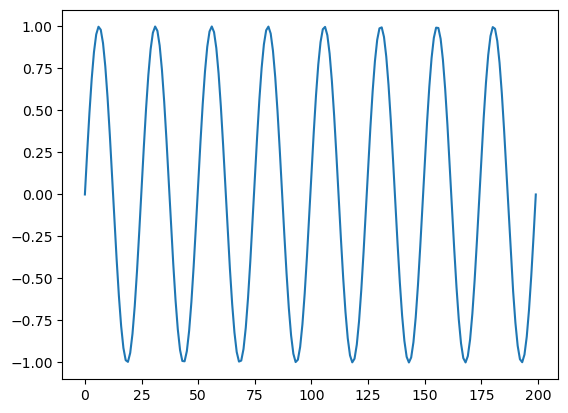

In [3]:
# n = np.arange (0, 100)
n = np.linspace (0, 4*np.pi, 200)

# x = (.5)**n + (.25)**n
# x = n**2
x = np.sin (n * 4)

PrintArray (x)

arCorfs: 
 [ 1.25337434e+00  5.35675862e-04  2.59802791e-04 -3.79769832e-01]


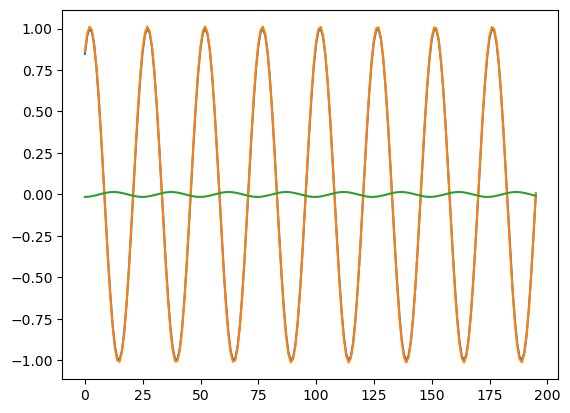

In [4]:
window = 4

print ('arCorfs: \n' , YuleWalkerACoefs (x, window))
xhad = YuleWalkerACoefsInverse (x, YuleWalkerACoefs (x, window), window)
x_diff = x[window:] - xhad[window:]

plt.plot (x[window:])
plt.plot (xhad[window:])
plt.plot (x_diff)
plt.show ()

# Testing for real 1D data (wav file)

In [5]:
fs, data = wavfile.read ('file-example.wav')

C:\Users\PC\AppData\Local\Temp\ipykernel_6936\3184951727.py:1: WavFileWarning: Chunk (non-data) not understood, skipping it.
  fs, data = wavfile.read ('file-example.wav')


In [6]:
print ('sample_rate: ', fs)
print ('data matrix shape: ', data.shape)

sample_rate:  44100
data matrix shape:  (262094, 2)


Data visulization:

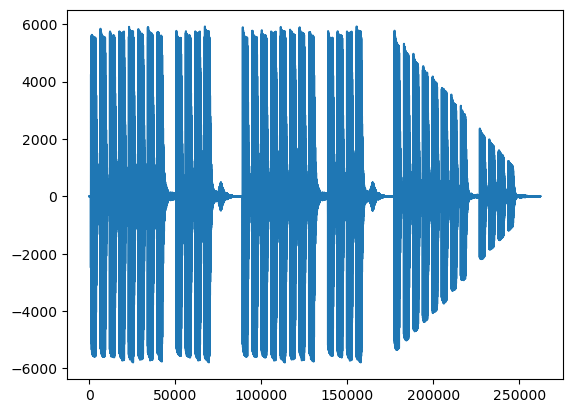

In [7]:
plt.plot (data[:, 0])

Comparing reconstructed data with actual data:

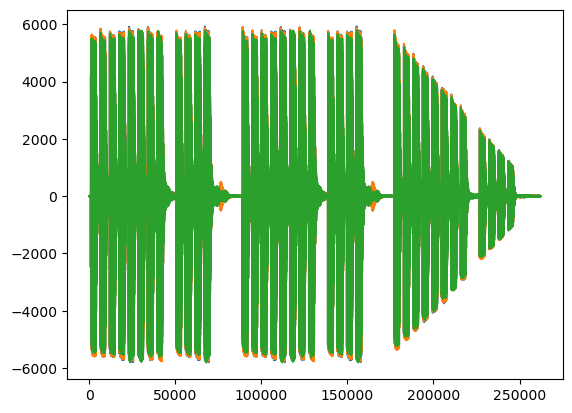

In [8]:
window = 4

wav_original_ch1 = data[:, 0]
wav_original_ch2 = data[:, 1]

wav_reconstructed_ch1 = np.int16(YuleWalkerACoefsInverse (wav_original_ch1, YuleWalkerACoefs (wav_original_ch1, window), window))
wav_reconstructed_ch2 = np.int16(YuleWalkerACoefsInverse (wav_original_ch2, YuleWalkerACoefs (wav_original_ch2, window), window))

plt.plot (wav_original_ch1[window:])
plt.plot (wav_reconstructed_ch1[window:])
plt.plot (wav_reconstructed_ch2[window:])
plt.show ()

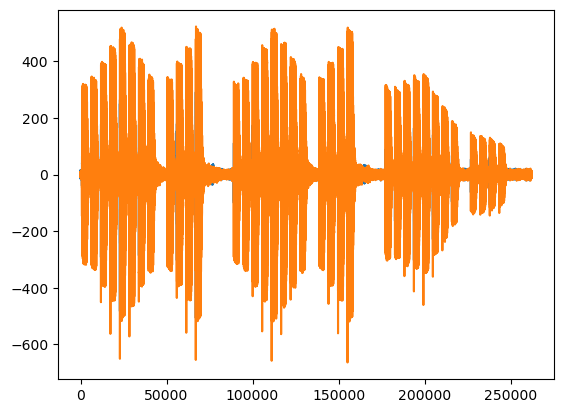

In [9]:
plt.plot (wav_original_ch1[window:] - wav_reconstructed_ch1[window:])
plt.plot (wav_original_ch2[window:] - wav_reconstructed_ch2[window:])
plt.show ()

Restoring data channels:

In [10]:
wav_reconstructed = np.vstack ((wav_reconstructed_ch1, wav_reconstructed_ch2)).T

wav_reconstructed.shape

(262094, 2)

Writing reconstructed matrix as a wav file:

In [11]:
wavfile.write ('wav_reconstructed.wav', fs, np.int16(wav_reconstructed))

In [12]:
x = np.arange (1, 6 + 1)
window = 4
print ('x : ', x)

r = []
r.append (np.mean (x[0:] * x[0:]))

print ('start loop: \n')
for i in range (1, window+1):
    # r.append (np.mean (x[0:-i] * x[i:]))
    print ('x :', x)
    print (x[:-i], x[i:])
    r.append (np.mean (x[:-i] * x[i:]))

print ('end loop: \n')

print ('r:\n', r, '\n')

R = np.transpose (r[1:])
print (r[1:])
print (R)
print ()

# FI = ConstructMatrixFi (window, r)

FI = np.zeros ((window, window))
for i in range (window):
    for j in range (window):
        distance = abs (i - j)
        FI[i, j] = r[distance]

print ('FI : \n', FI)
print ()

# aCoefs = np.linalg.inv(FI) * R
aCoefs = np.matmul(np.linalg.inv(FI) , R)
print ('inv(FI) :\n', np.linalg.inv (FI))
print ('R :\n', R, '\n', R.ndim)
print ()
print (aCoefs)

x :  [1 2 3 4 5 6]
start loop: 

x : [1 2 3 4 5 6]
[1 2 3 4 5] [2 3 4 5 6]
x : [1 2 3 4 5 6]
[1 2 3 4] [3 4 5 6]
x : [1 2 3 4 5 6]
[1 2 3] [4 5 6]
x : [1 2 3 4 5 6]
[1 2] [5 6]
end loop: 

r:
 [15.166666666666666, 14.0, 12.5, 10.666666666666666, 8.5] 

[14.0, 12.5, 10.666666666666666, 8.5]
[14.         12.5        10.66666667  8.5       ]

FI : 
 [[15.16666667 14.         12.5        10.66666667]
 [14.         15.16666667 14.         12.5       ]
 [12.5        14.         15.16666667 14.        ]
 [10.66666667 12.5        14.         15.16666667]]

inv(FI) :
 [[ 0.4791516  -0.50867679 -0.00867679  0.09026271]
 [-0.50867679  1.0021692  -0.4978308  -0.00867679]
 [-0.00867679 -0.4978308   1.0021692  -0.50867679]
 [ 0.09026271 -0.00867679 -0.50867679  0.4791516 ]]
R :
 [14.         12.5        10.66666667  8.5       ] 
 1

[ 1.02434322  0.02169197  0.02169197 -0.19787901]


In [13]:
import cv2 as cv

pic = cv.imread ('64pixel_2.png')
pic = cv.cvtColor(pic, cv.COLOR_BGR2GRAY)
print (pic.shape)
print (type (pic))

(6, 6)
<class 'numpy.ndarray'>


In [14]:
print (pic [:][:])

[[255 255 255 255 255 255]
 [  0   0   0   0   0   0]
 [255 255 255 255 255 255]
 [  0   0   0   0   0   0]
 [255 255 255 255 255 255]
 [  0   0   0   0   0   0]]


grayscale:


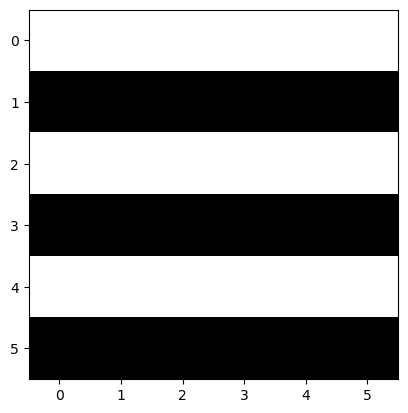

In [15]:
import matplotlib.pyplot as plt

print ('grayscale:')
plt.imshow (pic [:, :], cmap= 'gray')
plt.show ()

In [16]:
pic [3, :]

array([0, 0, 0, 0, 0, 0], dtype=uint8)

In [17]:
pic

array([[255, 255, 255, 255, 255, 255],
       [  0,   0,   0,   0,   0,   0],
       [255, 255, 255, 255, 255, 255],
       [  0,   0,   0,   0,   0,   0],
       [255, 255, 255, 255, 255, 255],
       [  0,   0,   0,   0,   0,   0]], dtype=uint8)

pic:
 [[255 255 255 255 255 255]
 [  0   0   0   0   0   0]
 [255 255 255 255 255 255]
 [  0   0   0   0   0   0]
 [255 255 255 255 255 255]
 [  0   0   0   0   0   0]] 

exclude_pixels:
 [(2, 3), (2, 2), (3, 2), (4, 2)] 

mask_leftside:
 [[ True  True  True  True  True  True]
 [ True  True  True  True  True  True]
 [ True  True  True False  True  True]
 [ True  True  True  True  True  True]
 [ True  True  True  True  True  True]
 [ True  True  True  True  True  True]] 

mask_rightside:
 [[ True  True  True  True  True  True]
 [ True  True  True  True  True  True]
 [ True  True  True  True  True  True]
 [ True  True  True  True  True  True]
 [ True  True  True False  True  True]
 [ True  True  True  True  True  True]] 

mask_leftside:
 [[ True  True  True  True  True  True]
 [ True  True  True  True  True  True]
 [ True  True False False  True  True]
 [ True  True  True  True  True  True]
 [ True  True  True  True  True  True]
 [ True  True  True  True  True  True]] 

mask_rightside:
 

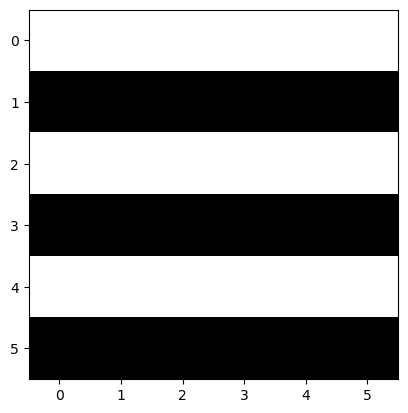

original:


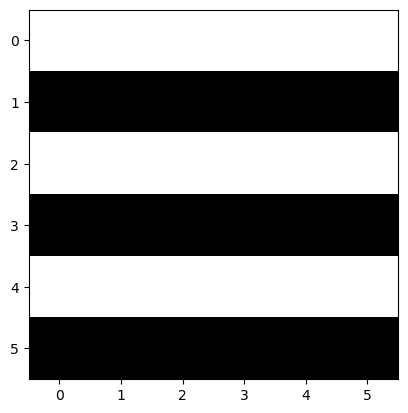

diff:


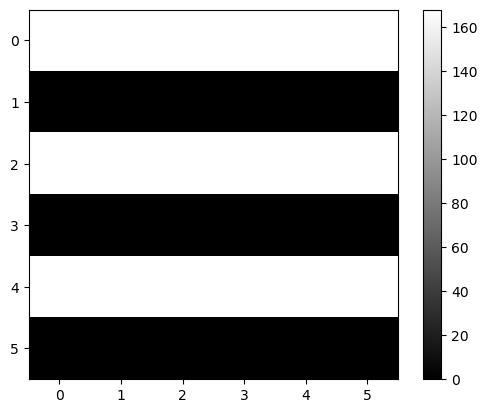

In [18]:
from math import floor
x = list(np.ravel (pic))
# print (x)
print ('pic:\n', pic, '\n')

r = []

'''
The Better Version:

In this method it generate a mask array and excludes the surrounding pixels. 

'''
# creating r array:

rows, cols = pic.shape
array_center_m, array_center_n = floor (rows/2), floor (cols/2)

def generate_exclude_pixels (offset):
    exclude_pixels = [(array_center_n-offset , array_center_m),
                      (array_center_n-offset , array_center_m-offset),
                      (array_center_n        , array_center_m-offset),
                      (array_center_n+offset , array_center_m-offset)]
    return exclude_pixels

mask_leftside = np.ones ((rows, cols), dtype=bool)
mask_rightside = np.ones ((rows, cols), dtype=bool)

print ('exclude_pixels:\n', generate_exclude_pixels (1), '\n')

for iter in range (1,4):
    # print ('iter:', iter)
    for idx in generate_exclude_pixels (1) [:iter]:
        mask_leftside[idx] = False
    for idx in generate_exclude_pixels (-1) [:iter]:
        mask_rightside [idx] = False

    print ('mask_leftside:\n', mask_leftside, '\n')
    print ('mask_rightside:\n', mask_rightside, '\n')

    r.append (np.mean (np.multiply (pic [mask_leftside], pic [mask_rightside])))


# print (r)

print ('-----------')

# creating FI for acoefs array:

R = np.transpose (r[1:])

FI = np.zeros ((2, 2))
for i in range (2):
    for j in range (2):
        distance = abs (i - j)
        FI[i, j] = r[distance]

print ('FI:\n', FI, '\n')

aCoefs = np.matmul(np.linalg.inv(FI) , R)

print ('aCoefs:\n', aCoefs, '\n')

# reconstructing picture:

xhad = [0 for i in range (1, len(x)+1)]

for m in range (1, len(x)):      # NOTE: replaced window with window-1 and it somehow improvred????
    a_temp = np.array ([])
    a_2 = 0
    for j in range (1):
        a_temp = (aCoefs[j] * x[m - j - 1])
        a_2 += a_temp
    xhad[m] = np.sum (a_2)

print ('----')        # NOTE: I removed the first skipped indices and added to the last index and it somehow solved the shifting problem????
# print (len(xhad))
# xhad = xhad [1:]
# print (len(xhad))
# xhad.append (x[-1])
# print (len(xhad))


xhad.append (xhad[-1])   # NOTE: This one is slightly better than a few lines above, as it's independent to x array.
xhad = xhad [1:]


xhad = np.array (xhad, dtype='uint8')


print ('pic:\n', pic)
print ('xhad:\n', xhad.reshape (6, 6))
print ('diff:\n', pic - xhad.reshape (6, 6))

rmse = np.linalg.norm(xhad - x) / np.sqrt(len(x))
print ('\nRMSE Score:', rmse)

print ('\nreconstructed:')
plt.imshow (xhad.reshape (6, 6), cmap='gray')
plt.show ()
print ('original:')
plt.imshow (pic, cmap='gray')
plt.show ()
print ('diff:')
plt.imshow (pic - xhad.reshape (6, 6), cmap='gray')
plt.colorbar ()
plt.show ()


In [19]:
'''
r = []
r.append (np.mean (x[0:] * x[0:]))

print ('start loop: \n')
for i in range (1, window+1):
    # r.append (np.mean (x[0:-i] * x[i:]))
    print ('x :', x)
    print (x[:-i], x[i:])
    r.append (np.mean (x[:-i] * x[i:]))

print ('end loop: \n')

print ('r:\n', r, '\n')

R = np.transpose (r[1:])
print (r[1:])
print (R)
print ()

# FI = ConstructMatrixFi (window, r)

FI = np.zeros ((window, window))
for i in range (window):
    for j in range (window):
        distance = abs (i - j)
        FI[i, j] = r[distance]

print ('FI : \n', FI)
print ()

# aCoefs = np.linalg.inv(FI) * R
aCoefs = np.matmul(np.linalg.inv(FI) , R)
print ('inv(FI) :\n', np.linalg.inv (FI))
print ('R :\n', R, '\n', R.ndim)
print ()
print (aCoefs)



xhad = [0 for i in range (1, len(x)+1)]

for m in range (window, len(x)):
    a_temp = np.array ([])
    a_2 = 0
    for j in range (window):
        a_temp = (aCoefs[j] * x[m - j - 1])
        a_2 += a_temp
    xhad[m] = np.sum (a_2)

'''

"\nr = []\nr.append (np.mean (x[0:] * x[0:]))\n\nprint ('start loop: \n')\nfor i in range (1, window+1):\n    # r.append (np.mean (x[0:-i] * x[i:]))\n    print ('x :', x)\n    print (x[:-i], x[i:])\n    r.append (np.mean (x[:-i] * x[i:]))\n\nprint ('end loop: \n')\n\nprint ('r:\n', r, '\n')\n\nR = np.transpose (r[1:])\nprint (r[1:])\nprint (R)\nprint ()\n\n# FI = ConstructMatrixFi (window, r)\n\nFI = np.zeros ((window, window))\nfor i in range (window):\n    for j in range (window):\n        distance = abs (i - j)\n        FI[i, j] = r[distance]\n\nprint ('FI : \n', FI)\nprint ()\n\n# aCoefs = np.linalg.inv(FI) * R\naCoefs = np.matmul(np.linalg.inv(FI) , R)\nprint ('inv(FI) :\n', np.linalg.inv (FI))\nprint ('R :\n', R, '\n', R.ndim)\nprint ()\nprint (aCoefs)\n\n\n\nxhad = [0 for i in range (1, len(x)+1)]\n\nfor m in range (window, len(x)):\n    a_temp = np.array ([])\n    a_2 = 0\n    for j in range (window):\n        a_temp = (aCoefs[j] * x[m - j - 1])\n        a_2 += a_temp\n    xhad

In [20]:
arr = np.array ([[1, 2, 3],
                 [4, 5, 6],
                 [7, 8, 9]])
print (arr)

mask = np.array ([[True, True, True],
                  [True, False, True],
                  [True, True, True]])

selected_pixels = arr[mask]

print (selected_pixels)

[[1 2 3]
 [4 5 6]
 [7 8 9]]
[1 2 3 4 6 7 8 9]
